In [98]:
cd D:\STUDY\codings\ML\Project\Vision Assistant

D:\STUDY\codings\ML\Project\Vision Assistant


In [99]:

import pickle
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import json
import pyttsx3
model = keras.models.load_model('adam_0.5_acc.h5')
object_classifier = keras.models.load_model("object_class.h5")
new_dict = json.load(open("decoder.json"))
inv_dict = json.load(open("encoder.json"))


 a man stands on a city street at night . end
 a white dog with brown spots runs through a field . end
 a group of people are standing on a beach at the ocean . end


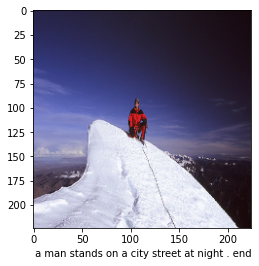

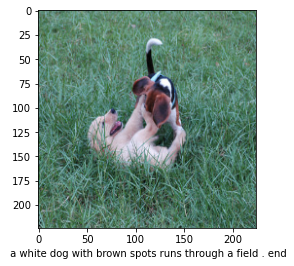

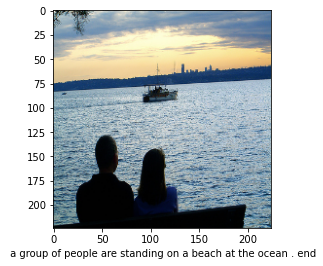

In [113]:
from glob import glob
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
count = 0
data_path = 'testing'
images_paths = glob(data_path+'\*.jpg')
for i in range(3):
    MAX_LEN = 36
    no = np.random.randint(0,28,(1,1))[0,0]
    test_img = cv2.imread(images_paths[no])
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img, (224,224))
    image = test_img.reshape(1,224,224,3) 
    test_feature = object_classifier.predict(image).reshape(2048,)
    text_inp = ['start']
    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='pre', truncating='pre', maxlen=MAX_LEN)
        test_feature = test_feature.reshape(1,2048)
        encoded = encoded.reshape(1,36)

        prediction = np.argmax(model.predict([test_feature, encoded]))
        prediction = str(prediction)

        sampled_word = inv_dict[prediction]


        caption = caption + ' ' + sampled_word

        if sampled_word == 'end':
            break

        text_inp.append(sampled_word)
    print(caption)
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)
    caption = caption.split('eos')[0]
    engine = pyttsx3.init()
    voices = engine.getProperty('voices')
    engine.setProperty('voice', voices[1].id)
    engine.setProperty("rate", 100)
    caption = caption.split('end')[0]
    engine.say(caption)
    engine.say("over")
    engine.runAndWait()